![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 2 - Clasificación de género de películas

El propósito de este proyecto es que puedan poner en práctica, en sus respectivos grupos de trabajo, sus conocimientos sobre técnicas de preprocesamiento, modelos predictivos de NLP, y la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 2: Clasificación de género de películas"

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 8. Sin embargo, es importante que avancen en la semana 7 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 8, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/2c54d005f76747fe83f77fbf8b3ec232).

## Datos para la predicción de género en películas

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/moviegenre.png)

En este proyecto se usará un conjunto de datos de géneros de películas. Cada observación contiene el título de una película, su año de lanzamiento, la sinopsis o plot de la película (resumen de la trama) y los géneros a los que pertenece (una película puede pertenercer a más de un género). Por ejemplo:
- Título: 'How to Be a Serial Killer'
- Plot: 'A serial killer decides to teach the secrets of his satisfying career to a video store clerk.'
- Generos: 'Comedy', 'Crime', 'Horror'

La idea es que usen estos datos para predecir la probabilidad de que una película pertenezca, dada la sinopsis, a cada uno de los géneros.

Agradecemos al profesor Fabio González, Ph.D. y a su alumno John Arevalo por proporcionar este conjunto de datos. Ver https://arxiv.org/abs/1702.01992

## Ejemplo predicción conjunto de test para envío a Kaggle
En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Importación librerías
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [10]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [11]:
# Visualización datos de entrenamiento
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [12]:
# Visualización datos de test
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [13]:
# Definición de variables predictoras (X)
vect = CountVectorizer(max_features=1000)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 1000)

In [14]:
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [15]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

In [16]:
# Definición y entrenamiento
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                     random_state=42))

In [17]:
# Predicción del modelo de clasificación
y_pred_genres = clf.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

np.float64(0.7717668029296991)

In [18]:
# transformación variables predictoras X del conjunto de test
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = clf.predict_proba(X_test_dtm)

In [19]:
# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_RF.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.115316,0.112545,0.021632,0.030826,0.396257,0.116158,0.062036,0.495677,0.066617,0.104482,...,0.025148,0.097838,0.000010,0.392608,0.064968,0.011944,0.018122,0.203969,0.022146,0.019669
4,0.133081,0.087854,0.023964,0.070760,0.343026,0.202546,0.099520,0.511076,0.063784,0.062972,...,0.024627,0.061687,0.002156,0.147331,0.059040,0.012346,0.019008,0.199905,0.040175,0.020344
5,0.158209,0.140732,0.018376,0.067342,0.340637,0.469086,0.006762,0.604303,0.088218,0.103984,...,0.022971,0.334849,0.000000,0.387805,0.112995,0.015059,0.022805,0.392327,0.067718,0.018431
6,0.165241,0.139772,0.027845,0.093197,0.333114,0.146278,0.020983,0.591203,0.076191,0.068679,...,0.111233,0.117495,0.010000,0.186832,0.099408,0.001430,0.038273,0.290187,0.079881,0.018423
7,0.165107,0.177139,0.046025,0.031550,0.317075,0.213078,0.028251,0.463566,0.077800,0.139171,...,0.024349,0.076296,0.000000,0.184966,0.266775,0.004899,0.020132,0.229698,0.023483,0.016585


In [20]:
# Preprocesamiento de texto y etiquetas para clasificación multilabel

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

# Asegurar que todas las entradas de la columna 'genres' estén en formato de lista
import ast  # más seguro que eval

def safe_literal_eval(val):
    if isinstance(val, list):
        return val
    try:
        return ast.literal_eval(val)
    except:
        return []

dataTraining['genres'] = dataTraining['genres'].map(safe_literal_eval)

# División antes del vectorizador para evitar data leakage
X_train_text, X_val_text, y_train_raw, y_val_raw = train_test_split(
    dataTraining['plot'], dataTraining['genres'], test_size=0.33, random_state=42
)

# Ajustar el vectorizador SOLO con el set de entrenamiento
vect = CountVectorizer(max_features=1000)
X_train = vect.fit_transform(X_train_text)
X_val = vect.transform(X_val_text)

# Binarización multilabel
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train_raw)
y_val = mlb.transform(y_val_raw)

# Confirmación de formas
print("X_train:", X_train.shape, "| y_train:", y_train.shape)
print("X_val:", X_val.shape, "| y_val:", y_val.shape)


X_train: (5289, 1000) | y_train: (5289, 24)
X_val: (2606, 1000) | y_val: (2606, 24)


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, roc_auc_score

# Creamos un clasificador base
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Definimos el clasificador multilabel
clf_ovr = OneVsRestClassifier(rf, n_jobs=-1)

# Definimos la grilla de hiperparámetros
param_grid = {
    'estimator__n_estimators': [100, 200],
    'estimator__max_depth': [10, 20],
    'estimator__min_samples_split': [2, 5]
}

# Definimos el scoring como ROC AUC macro (adecuado para multilabel)
scorer = make_scorer(roc_auc_score, average='macro', needs_proba=True)

# Ejecutamos GridSearchCV
grid_search = GridSearchCV(
    estimator=clf_ovr,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,
    verbose=1
)

# Entrenamos con los datos preprocesados
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=OneVsRestClassifier(estimator=RandomForestClassifier(n_jobs=-1,
                                                                            random_state=42),
                                           n_jobs=-1),
             param_grid={'estimator__max_depth': [10, 20],
                         'estimator__min_samples_split': [2, 5],
                         'estimator__n_estimators': [100, 200]},
             scoring=make_scorer(roc_auc_score, response_method='predict', average=macro, needs_proba=True),
             verbose=1)

In [22]:
# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Mejor resultado de ROC AUC en validación cruzada
print("Mejor ROC AUC (CV):", grid_search.best_score_)


Mejores hiperparámetros: {'estimator__max_depth': 10, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 100}
Mejor ROC AUC (CV): nan


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Suponiendo que ya tienes X_train, X_val, y_train_genres, y_val_genres definidos y preprocesados

# Definir el modelo base con OneVsRest para multilabel
clf = OneVsRestClassifier(RandomForestClassifier(random_state=42, n_jobs=-1))

# Parámetros para la calibración (Grid Search)
param_grid = {
    'estimator__n_estimators': [50, 100],
    'estimator__max_depth': [10, 20, None],
    'estimator__min_samples_split': [2, 5],
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Entrenar GridSearch con el set de entrenamiento
grid_search.fit(X_train, y_train_genres)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predecir probabilidades en set de validación

y_pred_proba = best_model.predict_proba(X_val)

# Calcular ROC AUC macro promedio
roc_auc = roc_auc_score(y_val, y_pred_proba, average='macro')

print("Mejores parámetros:", grid_search.best_params_)
print(f"ROC AUC macro promedio (validación): {roc_auc:.4f}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejores parámetros: {'estimator__max_depth': 10, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 100}
ROC AUC macro promedio (validación): 0.7645


In [28]:
from sklearn.metrics import roc_auc_score, accuracy_score, hamming_loss
import numpy as np

# Entrenamiento final con mejores hiperparámetros
final_clf = OneVsRestClassifier(
    RandomForestClassifier(
        n_estimators=grid_search.best_params_['estimator__n_estimators'],
        max_depth=grid_search.best_params_['estimator__max_depth'],
        min_samples_split=grid_search.best_params_['estimator__min_samples_split'],
        random_state=42,
        n_jobs=-1
    )
)

final_clf.fit(X_train, y_train_genres)

# Predicción probabilística y binaria (con umbral 0.5)
y_val_pred_proba = final_clf.predict_proba(X_val)
y_val_pred_bin = (y_val_pred_proba >= 0.5).astype(int)

# Cálculo de métricas
roc_auc = roc_auc_score(y_val, y_val_pred_proba, average='macro')
accuracy = accuracy_score(y_val, y_val_pred_bin)
hamming = hamming_loss(y_val, y_val_pred_bin)

print(f"ROC AUC macro promedio (validación): {roc_auc:.4f}")
print(f"Exactitud multilabel (accuracy) (validación): {accuracy:.4f}")
print(f"Pérdida Hamming (validación): {hamming:.4f}")

# Análisis adicional: promedio de etiquetas predichas por observación
avg_labels_true = np.mean(y_val.sum(axis=1))
avg_labels_pred = np.mean(y_val_pred_bin.sum(axis=1))

print(f"Promedio de etiquetas verdaderas por muestra: {avg_labels_true:.2f}")
print(f"Promedio de etiquetas predichas por muestra: {avg_labels_pred:.2f}")


ROC AUC macro promedio (validación): 0.7645
Exactitud multilabel (accuracy) (validación): 0.0464
Pérdida Hamming (validación): 0.1056
Promedio de etiquetas verdaderas por muestra: 2.74
Promedio de etiquetas predichas por muestra: 0.62


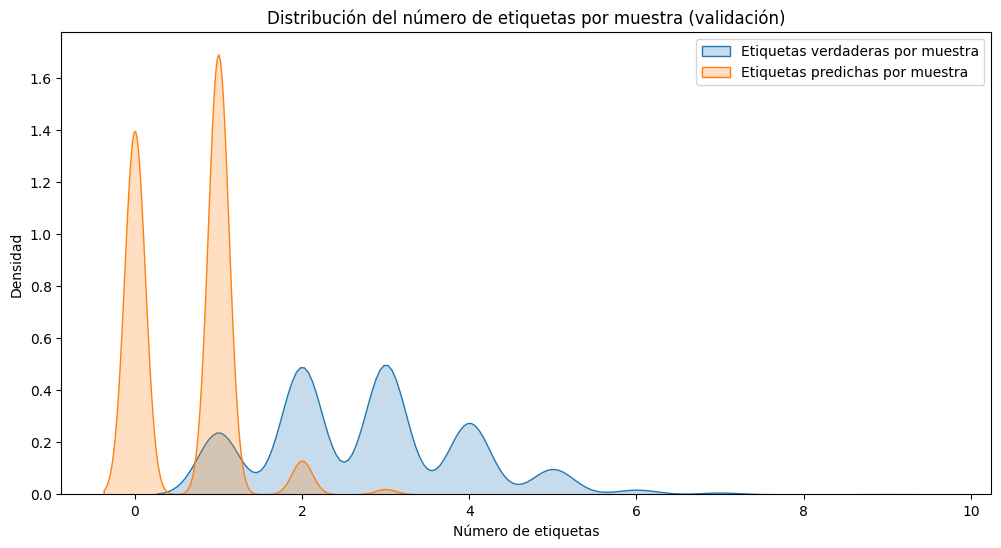

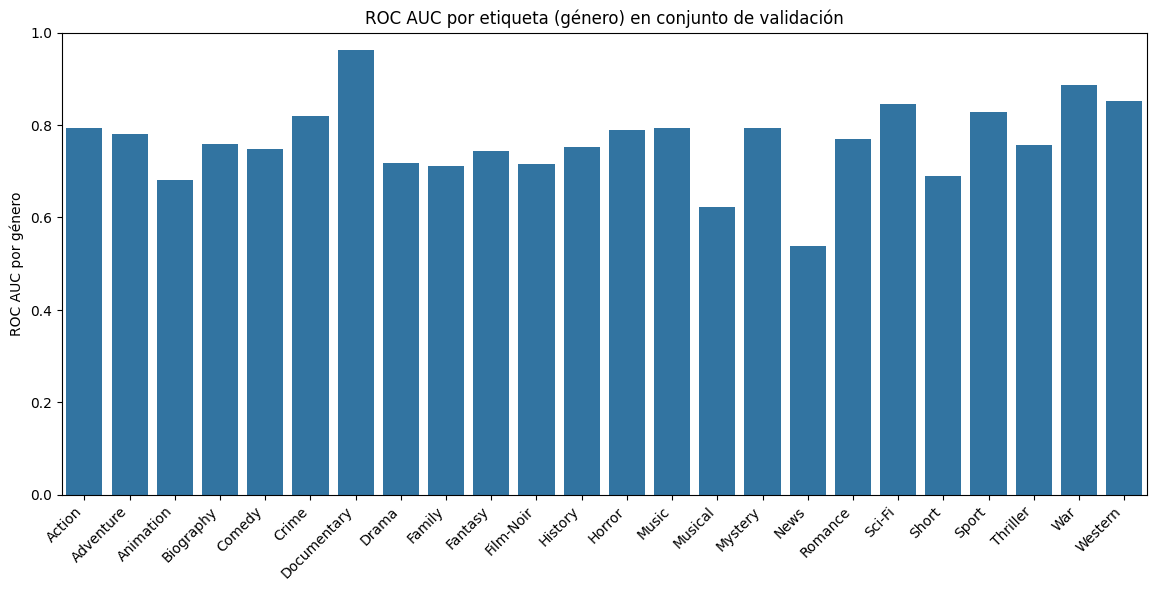

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribución de etiquetas verdaderas y predichas por muestra

true_labels_per_sample = y_val.sum(axis=1)
pred_labels_per_sample = y_val_pred_bin.sum(axis=1)

plt.figure(figsize=(12,6))
sns.kdeplot(true_labels_per_sample, label='Etiquetas verdaderas por muestra', fill=True)
sns.kdeplot(pred_labels_per_sample, label='Etiquetas predichas por muestra', fill=True)
plt.xlabel('Número de etiquetas')
plt.ylabel('Densidad')
plt.title('Distribución del número de etiquetas por muestra (validación)')
plt.legend()
plt.show()

# 2. ROC AUC por etiqueta (cada género)

roc_auc_per_label = []
for i in range(y_val.shape[1]):
    score = roc_auc_score(y_val[:, i], y_val_pred_proba[:, i])
    roc_auc_per_label.append(score)

plt.figure(figsize=(14,6))
sns.barplot(x=le.classes_, y=roc_auc_per_label)
plt.xticks(rotation=45, ha='right')
plt.ylabel('ROC AUC por género')
plt.title('ROC AUC por etiqueta (género) en conjunto de validación')
plt.ylim(0, 1)
plt.show()


In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
import joblib

# Carga de datos
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

# Convertir 'genres' a listas si no está ya en formato lista
dataTraining['genres'] = dataTraining['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Vectorización texto (solo ajustar con datos de entrenamiento)
vect = CountVectorizer(max_features=1000)
X_dtm = vect.fit_transform(dataTraining['plot'])

# Binarización de etiquetas multilabel
mlb = MultiLabelBinarizer()
y_genres = mlb.fit_transform(dataTraining['genres'])

# División en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

# Definir y entrenar modelo simple Random Forest con OneVsRestClassifier
clf_simple = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1))
clf_simple.fit(X_train, y_train)

# Guardar modelo entrenado y vectorizador y binarizador para la API
joblib.dump(clf_simple, 'modelo_rf_multilabel.pkl')
joblib.dump(vect, 'vectorizer.pkl')
joblib.dump(mlb, 'mlb_binarizer.pkl')


['mlb_binarizer.pkl']